# <font color = Blue> Lead Scoring Case Study
    
**Identifying hot leads using  `Logistic Regression`**

Authors : Santh Raul & Ramlal Naik

## Problem Statement
An education company named __X Education__ sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. <br>

__When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals.__<br>

Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. __The typical lead conversion rate at X education is around 30%.__
 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as __‘Hot Leads’__. <br>

If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:
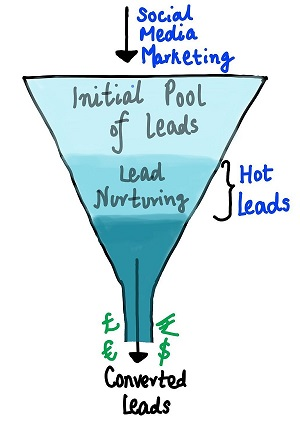



__Lead Conversion Process__ - Demonstrated as a funnel
As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom.<br>

In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion. 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. <br>
The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.

__The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.__


 

### Data

You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted.

Another thing that you also need to check out for are the levels present in the categorical variables.<br>

__Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value.__

 

### Goal


1. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

## Technical Approach:

1.  Read and Inspect DataSet
2. Data Cleaning
    - Handling the “Select” level
    - Missing Value Treatement
    - Data Transformation
3. Exploratory Data Analysis
    - Outlier Treatement
    - Categorical Variables Analysis
    - NUmerical Variables Analysis
4. Data Preparation
    - Dummies for all categorical columns.
    - train-test split.
    - Feature Scaling
5. Model Building
    - Varible selction using RFE
    - Build Logistic Regression model
6. Model Evalaution
    - Finding optmial cut-off
    - Metrics Evaluation in train set
    - Validating model metrics on test set
    - Model Summary
7. Lead Scoring
    - Final Prediction and Lead scoring
    - Feature Importance
8. Conclusion & Recommendation

## i. Import Required Libraries

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline

# Data display coustomization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## 1. Read and Inspect data Set

### 1.1 Read and Inspect data Set

In [2]:
df = pd.read_csv('Leads.csv')
df.head(5) 

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# shape of data set
print('Rows and columns of the dataset (Rows , Columns): ', df.shape)

Rows and columns of the dataset (Rows , Columns):  (9240, 37)


In [4]:
# Look for data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
# insights from dataset
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
# check for duplicate Leads
print('No of duplicate Leads :', df['Lead Number'].duplicated().sum())

No of duplicate Leads : 0


Insights:
- There are `9240` obesrvation and `37` features in the dataset
- No duplicate entry observed in the dataset
- `Tags, Lead Quality, Lead Profile, Asymmetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score, Asymmetrique Profile Score` are the features which are recorded after interaction of sales team with the lead. So as a input to model, these data will not availble. Hence we will drop these variables from dataframe.
- `Prospect ID` and `Lead Number` are identification number for lead. So we will keep `Lead Number` to identify the lead and drop `Prospect ID` from our dataframe.

## 2. Cleaning dataset

### 2.1 Drop Unwanted Columns

In [7]:
# list of columns having information of post interaction with lead
score_cols = ['Tags', 'Lead Quality', 'Lead Profile', 'Asymmetrique Activity Index' ,
              'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score',
             'I agree to pay the amount through cheque', 'Prospect ID', 'Last Notable Activity']

# drop score_cols
df.drop(score_cols, axis = 1, inplace = True)
df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,A free copy of Mastering The Interview
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,No
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,No
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,Yes
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No


### 2.2 Check Null Values:

There are some columns having value as `Select` which is basically missing value at random. So we need to convert them into `NaN` and after that we will do the further analysis of null values.

In [8]:
# Check for value 'Select' in the columns
sel_cols = df.isin(['Select']).sum(axis=0)
sel_cols[sel_cols>0]

Specialization                        1942
How did you hear about X Education    5043
City                                  2249
dtype: int64

Insights:
- There are three columns `Specialization`, `How did you hear about X Education` and `City` are having high number of value as `select`. we will impute these values to `NaN`.

In [9]:
# replace 'Select' with 'NaN'
df['Specialization'].replace('Select', np.nan, inplace= True)
df['How did you hear about X Education'].replace('Select', np.nan, inplace= True)
df['City'].replace('Select', np.nan, inplace= True)

#Check for value 'Select' inthe columns
sel_cols = df.isin(['Select']).sum(axis=0)
sel_cols[sel_cols>0]

Series([], dtype: int64)

In [10]:
# check % Null values
print('Pecentage of null values:\n')
print(round(df.isnull().mean()*100, 2))

Pecentage of null values:

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                     

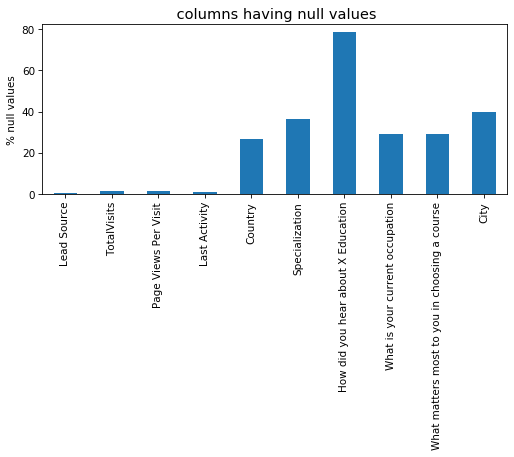

In [11]:
# grafical representation of columns having % null values
# features having null value
null_cols = round(df.isnull().mean()*100, 2)
null_cols = null_cols[null_cols>0]

# plot columns having null value
plt.figure(figsize= (8,3),dpi=75)
null_cols.plot(kind = 'bar')
plt.title (' columns having null values', fontsize = 14)
plt.ylabel('% null values')
plt.show()
# plt.savefig('filename.png', dpi=300)

In [12]:
# Select columns having more that 50% null values
null_50 = null_cols[null_cols.values>50]
print('Null values >50% :')
print(null_50)

# Check columns having null value<2%
null_2 = null_cols[(null_cols>0) & (null_cols<2)]
print('\nNull values <2% :')
print(null_2)

Null values >50% :
How did you hear about X Education    78.46
dtype: float64

Null values <2% :
Lead Source             0.39
TotalVisits             1.48
Page Views Per Visit    1.48
Last Activity           1.11
dtype: float64


Insights:
- There are 10 columns having null value
- `How did you hear about X Education` is having null value more that 50%. We will drop these columns.
- `Lead Source, TotalVisits, Page Views Per Visit, Last Activity` are having null value < 2%. We will drop these rows having null value
- Rest of the columns we will impute null vaules with suitable value.

In [13]:
# dropping features having more than 
df.drop(null_50.index, axis =1, inplace= True)

# Check NUll values after dropping
null_cols = round(df.isnull().mean()*100,2)
null_cols = null_cols[null_cols>0]
null_cols

Lead Source                                       0.39
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
City                                             39.71
dtype: float64

In [14]:
# drop rows for featues where null values <2%.

df.dropna(subset = null_2.index, inplace = True)

# check for null colums after dropping of rows
null_cols = round(df.isnull().mean()*100,2)
null_cols = null_cols[null_cols>0]
null_cols

Country                                          25.30
Specialization                                   36.17
What is your current occupation                  29.57
What matters most to you in choosing a course    29.78
City                                             39.40
dtype: float64

In [15]:
# Check % of retailned observations
print('% retained observation: ', round(len(df)/9240*100,2))

% retained observation:  98.2


In [16]:
# get the data insight for rest of the null columns
df[null_cols.index].describe()

,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,City
count,6778,5792,6391,6372,5499
unique,38,18,6,3,6
top,India,Finance Management,Unemployed,Better Career Prospects,Mumbai
freq,6491,959,5476,6370,3177


In [17]:
# Percentage of most frequent value with respect to total counts
df[null_cols.index].describe().loc['freq']/df[null_cols.index].describe().loc['count']*100

Country                                          95.7657
Specialization                                   16.5573
What is your current occupation                   85.683
What matters most to you in choosing a course    99.9686
City                                             57.7741
dtype: object

Insights:

-`Country`, `What matters most to you in choosing a course` are having most frequent values more than 95%. We need to be carefull while treating these columns

**Country:**

In [18]:
# Percentage value of data
round(df['Country'].value_counts(normalize = True)*100, 2)

India                   95.77
United States            1.02
United Arab Emirates     0.78
Singapore                0.35
Saudi Arabia             0.31
United Kingdom           0.22
Australia                0.19
Qatar                    0.15
Bahrain                  0.10
Hong Kong                0.10
France                   0.09
Oman                     0.09
unknown                  0.07
Canada                   0.06
Kuwait                   0.06
Germany                  0.06
South Africa             0.06
Nigeria                  0.06
Sweden                   0.04
Ghana                    0.03
China                    0.03
Philippines              0.03
Bangladesh               0.03
Netherlands              0.03
Asia/Pacific Region      0.03
Italy                    0.03
Belgium                  0.03
Uganda                   0.03
Malaysia                 0.01
Switzerland              0.01
Russia                   0.01
Sri Lanka                0.01
Tanzania                 0.01
Denmark   

Insight:
    
- `Country`: The data is highly skewed having ~95% value as `India`. Imputing `NaN` as India is going to further increase the skewness. 
- So keeping this column will not contribute to our model. Hence we will drop the `Country` column 

In [19]:
# drop country column
df.drop('Country', axis =1, inplace = True)

**Specialization:**

In [20]:
# value counts for 'Specialisation'
round(df['Specialization'].value_counts(normalize=True)*100, 2)

Finance Management                   16.56
Human Resource Management            14.45
Marketing Management                 14.21
Operations Management                 8.62
Business Administration               6.89
IT Projects Management                6.32
Supply Chain Management               5.97
Banking, Investment And Insurance     5.78
Travel and Tourism                    3.49
Media and Advertising                 3.49
International Business                3.04
Healthcare Management                 2.69
Hospitality Management                1.92
E-COMMERCE                            1.92
Retail Management                     1.73
Rural and Agribusiness                1.26
E-Business                            0.98
Services Excellence                   0.69
Name: Specialization, dtype: float64

Insights:

`Specialization:` As there are multiple specialisation having similar %, so we cann't conclude the null value as a specific Specialisation. So we will impute null values as `Unknown`.

In [21]:
# impute missing values of 'Sepcialisation ' column to 'Other'
df['Specialization'].replace(np.nan, 'Unknown', inplace = True)

**What is your current occupation:**

In [22]:
# value counts in % 'What is your current occupation'
round(df['What is your current occupation'].value_counts(normalize=True)*100, 2)

Unemployed              85.68
Working Professional    10.59
Student                  3.22
Other                    0.23
Housewife                0.14
Businessman              0.13
Name: What is your current occupation, dtype: float64

Insights:

`What is your current occupation:` 
- Maximum Lead are from Uneployed level. So we will impute null value as `Unemployed`. 
- Also we will combine categories `Housewife`, `businessman` to `Other` as these are having verry low %.
- Although the data spred is slightly skewed, we wffel this as mportant variable, so we would like to keep this variable and let model to decide.

In [23]:
# impute 'How did you hear about X Education' column
df['What is your current occupation'].replace(np.nan,'Unemployed', inplace=True )
df['What is your current occupation'].replace(['Housewife','Businessman'],'Other', inplace=True )

In [24]:
# value counts in 'What is your current occupation' after imputation
round(df['What is your current occupation'].value_counts(normalize=True)*100, 2)

Unemployed              89.92
Working Professional     7.46
Student                  2.27
Other                    0.35
Name: What is your current occupation, dtype: float64

**What matters most to you in choosing a course:**

In [25]:
# value counts 'What matters most to you in choosing a course'
round(df['What matters most to you in choosing a course'].value_counts(normalize=True)*100, 2)

Better Career Prospects      99.97
Other                         0.02
Flexibility & Convenience     0.02
Name: What matters most to you in choosing a course, dtype: float64

Insight:
    
`What matters most to you in choosing a course`: The data is highly skewed having ~99% value as `Better Career Prospects`. Keeping this column will not contribute to our model. so we will drop this column .

In [26]:
# drop 'What matters most to you in choosing a course' column
df.drop('What matters most to you in choosing a course', axis =1, inplace = True)

**City:**

In [27]:
# value counts 'City'
round(df['City'].value_counts(normalize=True)*100, 2)

Mumbai                         57.77
Thane & Outskirts              13.55
Other Cities                   12.37
Other Cities of Maharashtra     8.11
Other Metro Cities              6.86
Tier II Cities                  1.35
Name: City, dtype: float64

Insights: `City` 

- The missing value is completely random, So we will impute this to mode of category which is `Mumbai`
- We will combine `Other Cities`, `Other Cities of Maharashtra`, `Tier II Cities` into ` Other Cities`

In [28]:
# Imputation of null values 'City'
df['City'] = df['City'].replace(np.nan, 'Mumbai')
df['City'].replace(['Other Cities of Maharashtra', 'Tier II Cities'],'Other Cities', inplace=True )

# value counts 'City'
round(df['City'].value_counts(normalize=True)*100, 2)

Mumbai                74.41
Other Cities          13.22
Thane & Outskirts      8.21
Other Metro Cities     4.15
Name: City, dtype: float64

**Final Check for Null values:**

In [29]:
# check for null colums after dropping of rows
df.isnull().mean()

Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Search                                    0.0
Magazine                                  0.0
Newspaper Article                         0.0
X Education Forums                        0.0
Newspaper                                 0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
Receive More Updates About Our Courses    0.0
Update me on Supply Chain Content         0.0
Get updates on DM Content         

- Now the dataframe is clean & we can proceed for analysis with this dataset

### 2.3 Data Transformation:

In [30]:
# Select Object columns
cat_var = df.select_dtypes('O').columns
cat_var

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'A free copy of Mastering The Interview'],
      dtype='object')

In [31]:
# insights of categorical variables
df[cat_var].describe()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,A free copy of Mastering The Interview
count,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074
unique,4,21,2,2,17,19,4,2,1,2,2,2,2,2,1,1,1,4,2
top,Landing Page Submission,Google,No,No,Email Opened,Unknown,Unemployed,No,No,No,No,No,No,No,No,No,No,Mumbai,No
freq,4885,2868,8358,9072,3432,3282,8159,9060,9074,9072,9073,9073,9070,9067,9074,9074,9074,6752,6186


In [32]:
# Percentage of most frequent value with respect to total counts
df_cat = df[cat_var].describe().loc['freq']/len(df)*100
df_cat.sort_values(ascending=False)

Get updates on DM Content                     100
Update me on Supply Chain Content             100
Receive More Updates About Our Courses        100
Magazine                                      100
Newspaper                                  99.989
X Education Forums                         99.989
Newspaper Article                          99.978
Do Not Call                                99.978
Digital Advertisement                     99.9559
Through Recommendations                   99.9229
Search                                    99.8457
Do Not Email                              92.1093
What is your current occupation           89.9162
City                                      74.4104
A free copy of Mastering The Interview    68.1728
Lead Origin                               53.8351
Last Activity                             37.8223
Specialization                            36.1693
Lead Source                               31.6068
Name: freq, dtype: object

Insight:
- based on above analysis we can infer that following columns are having one value more that 90%, so it would not contribute to model. Therefore we would drop these columns.

> `'Get updates on DM Content', 'Update me on Supply Chain Content', 'Receive More Updates About Our Courses', 'Magazine', 'Newspaper', 'X Education Forums', 'Newspaper Article', 'Do Not Call', 'Digital Advertisement', 'Through Recommendations', 'Search', 'Do Not Email'`

In [33]:
# Drop skewed columns (most frequest values >90%)
cat_cols = ['Get updates on DM Content', 'Update me on Supply Chain Content', 'Receive More Updates About Our Courses', 
        'Magazine', 'Newspaper', 'X Education Forums', 'Newspaper Article', 'Do Not Call', 'Digital Advertisement', 
        'Through Recommendations', 'Search', 'Do Not Email']
df.drop(cat_cols, axis = 1, inplace=True)

df.shape

(9074, 12)

In [34]:
# Select Object columns
cat_var = df.select_dtypes('O').columns
cat_var

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'City',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [35]:
# insights of categorical variable
df[cat_var].describe()

,Lead Origin,Lead Source,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview
count,9074,9074,9074,9074,9074,9074,9074
unique,4,21,17,19,4,4,2
top,Landing Page Submission,Google,Email Opened,Unknown,Unemployed,Mumbai,No
freq,4885,2868,3432,3282,8159,6752,6186


Insights:
- We could find following column in categorical data type having higher number of unique values. We will inspect unique values into and try to combine and reduce the number unique value.
> `'Lead Source','Specialization', 'Last Activity'`

**Lead Source**

In [36]:
# lead source
df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
NC_EDM                  1
WeLearn                 1
testone                 1
Pay per Click Ads       1
youtubechannel          1
welearnblog_Home        1
blog                    1
Name: Lead Source, dtype: int64

Insights:

- We will combine follwing unique values,
    1. Google, google and bing : `Google` (as these are seacrh engine)
    2. FaceBook, Click2call, Press_Release, Social Media, Live Chat, youtubechannel, NC_EDM, WeLearn, testone, welearnblog_Home, blog, Pay per Click Ads : `SocialMedia_Others` (as these are social media and other media sources)

In [37]:
# combining values of lead source
df['Lead Source'].replace(['google','bing'], 'Google', inplace = True)
df['Lead Source'].replace(['Facebook', 'Click2call', 'Press_Release', 'Social Media', 'Live Chat', 'youtubechannel', 
                           'NC_EDM', 'WeLearn', 'testone', 'welearnblog_Home', 'blog', 'Pay per Click Ads'],
                          'SocialMedia_Others', inplace = True)

# check value couts after combining
df['Lead Source'].value_counts()

Google                2879
Direct Traffic        2543
Olark Chat            1753
Organic Search        1154
Reference              443
Welingak Website       129
Referral Sites         125
SocialMedia_Others      48
Name: Lead Source, dtype: int64

***Specialization***

In [38]:
# Specialisation
df['Specialization'].value_counts()

Unknown                              3282
Finance Management                    959
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Travel and Tourism                    202
Media and Advertising                 202
International Business                176
Healthcare Management                 156
Hospitality Management                111
E-COMMERCE                            111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

Insights:

- We will combine follwing unique values as follwing:

        1. Operation Management: Supply Chain Management
        2. Finance Management: Banking, Investment And Insurance
        3. Other_Specialization: 'Media and Advertising', 'Travel and Tourism', 'International Business', 'Healthcare Management', 'E-COMMERCE', 'Hospitality Management', 'Retail Management', 'Rural and Agribusiness', 'E-Business', 'Services Excellence'

In [39]:
# combining values of Specialisation
df['Specialization'].replace(['Supply Chain Management'],'Operation Management', inplace = True)
df['Specialization'].replace(['Banking, Investment And Insurance'], 'Finance Management', inplace = True)
df['Specialization'].replace(['Media and Advertising', 'Travel and Tourism', 'International Business', 
                              'Healthcare Management', 'E-COMMERCE', 'Hospitality Management', 'Retail Management',
                              'Rural and Agribusiness', 'E-Business', 'Services Excellence'], 'Other_Specialization',
                             inplace = True)

# check value couts after combining
df['Specialization'].value_counts(normalize= True)*100

Unknown                      36.169275
Finance Management           14.260525
Other_Specialization         13.533172
Human Resource Management     9.224157
Marketing Management          9.069870
Operations Management         5.499229
Business Administration       4.397179
IT Projects Management        4.033502
Operation Management          3.813092
Name: Specialization, dtype: float64

**Last Activity:**

In [40]:
# Last Notable Activity
df['Last Activity'].value_counts(normalize = True)*100

Email Opened                    37.822350
SMS Sent                        29.931673
Olark Chat Conversation         10.711924
Page Visited on Website          7.053119
Converted to Lead                4.716773
Email Bounced                    3.438395
Email Link Clicked               2.942473
Form Submitted on Website        1.278378
Unreachable                      0.991845
Unsubscribed                     0.650209
Had a Phone Conversation         0.275512
View in browser link Clicked     0.066123
Approached upfront               0.055102
Email Received                   0.022041
Email Marked Spam                0.022041
Resubscribed to emails           0.011020
Visited Booth in Tradeshow       0.011020
Name: Last Activity, dtype: float64

Insights:

- We will combine following unique values to `Other_Activity`:

    `'Email Bounced', 'Unsubscribed', 'Unreachable', 'Had a Phone Conversation','Email Marked Spam', 'Form Submitted on Website','Email Received','Resubscribed to emails', 'Approached upfront','View in browser link Clicked'`

In [41]:
# combining values of Last Notable Activity
df['Last Activity'].replace(['Email Bounced','Email Link Clicked', 'Form Submitted on Website', 'Unreachable',
                                     'Unsubscribed', 'Had a Phone Conversation','View in browser link Clicked', 
                                     'Approached upfront', 'Email Received','Email Marked Spam', 
                                     'Visited Booth in Tradeshow','Resubscribed to emails'],'Other_Activity',
                                    inplace = True)

# check value couts after combining
df['Last Activity'].value_counts(normalize= True)*100

Email Opened               37.822350
SMS Sent                   29.931673
Olark Chat Conversation    10.711924
Other_Activity              9.764161
Page Visited on Website     7.053119
Converted to Lead           4.716773
Name: Last Activity, dtype: float64

In [42]:
# chack categorical variables after data cleaning
df.describe(include='O')

,Lead Origin,Lead Source,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview
count,9074,9074,9074,9074,9074,9074,9074
unique,4,8,6,9,4,4,2
top,Landing Page Submission,Google,Email Opened,Unknown,Unemployed,Mumbai,No
freq,4885,2879,3432,3282,8159,6752,6186


## 3. Exploratory data Analysis

Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0).

In [43]:
# check convertion rate
print('convertion rate (%):', round(df['Converted'].mean()*100,2))

convertion rate (%): 37.86


In [44]:
# Get insights of numerical variables
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,617032.619352,0.378554,3.456028,482.887481,2.370151
std,23348.029512,0.485053,4.858802,545.256560,2.160871
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596406.000000,0.000000,1.000000,11.000000,1.000000
50%,615278.500000,0.000000,3.000000,246.000000,2.000000
75%,637176.500000,1.000000,5.000000,922.750000,3.200000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


### 3.1 Outlier treatment

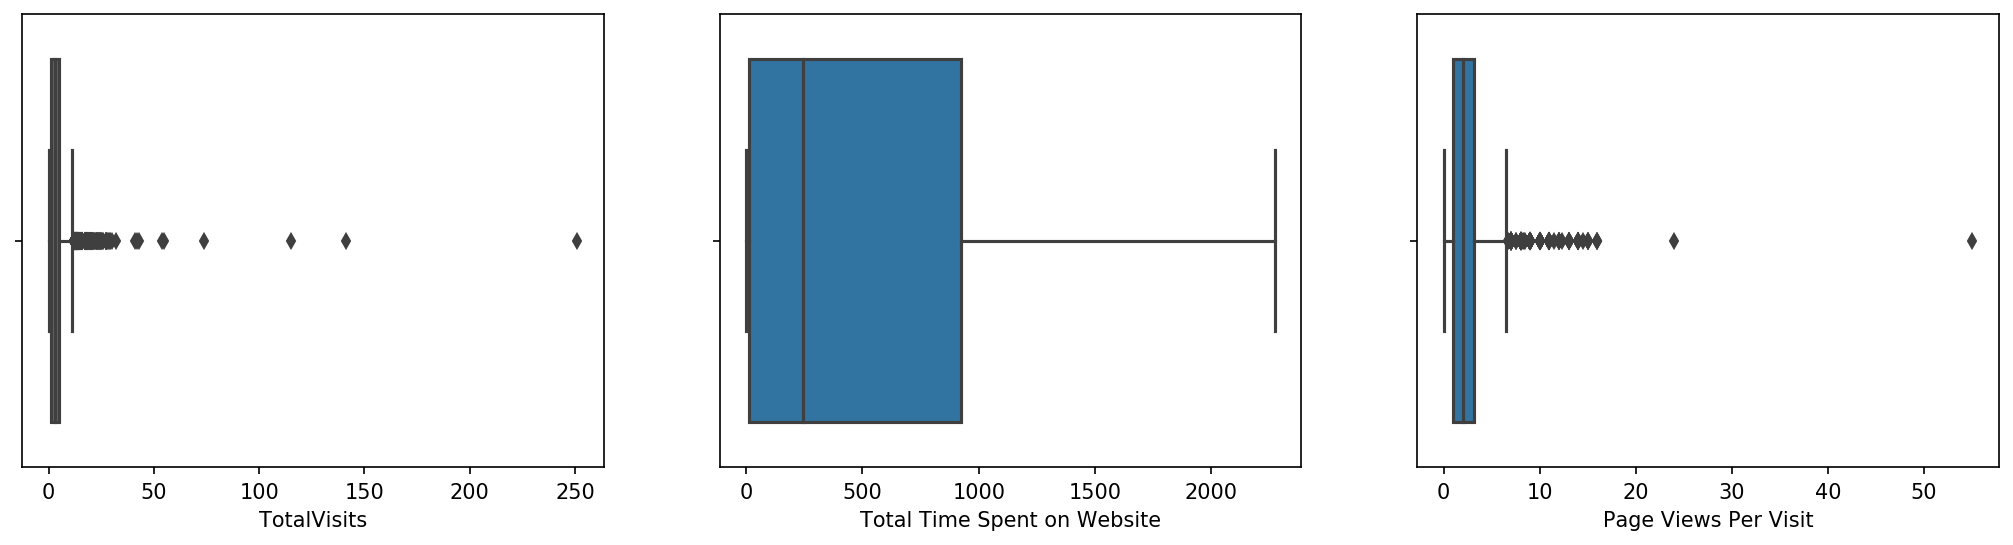

In [45]:
# boxplot for continous variable and check for outliers 
plt.figure(figsize=(17,4), dpi= 150)
plt.subplot(1,3,1)
sns.boxplot(df['TotalVisits'])

plt.subplot(1,3,2)
sns.boxplot(df['Total Time Spent on Website'])

plt.subplot(1,3,3)
sns.boxplot(df['Page Views Per Visit'])

plt.show()

Insight:

- we have two outlier variables in our dataset: `TotalVisits`,`Page Views Per Visit`
- If we drop these outliers, we may loose significant volume of observations. So we will do the outlier treatment using upper capping.

In [46]:
# Outlier capping 'TotalVisits'
IQR = df['TotalVisits'].quantile(0.75)-df['TotalVisits'].quantile(0.25)
UL = df['TotalVisits'].quantile(0.75) + IQR*1.5
df.loc[df['TotalVisits'] > UL, 'TotalVisits'] = UL

In [47]:
# Outlier capping 'Page Views Per Visit'
IQR = df['Page Views Per Visit'].quantile(0.75)-df['Page Views Per Visit'].quantile(0.25)
UL = df['Page Views Per Visit'].quantile(0.75) + IQR*1.5
df.loc[df['Page Views Per Visit'] > UL, 'Page Views Per Visit'] = UL

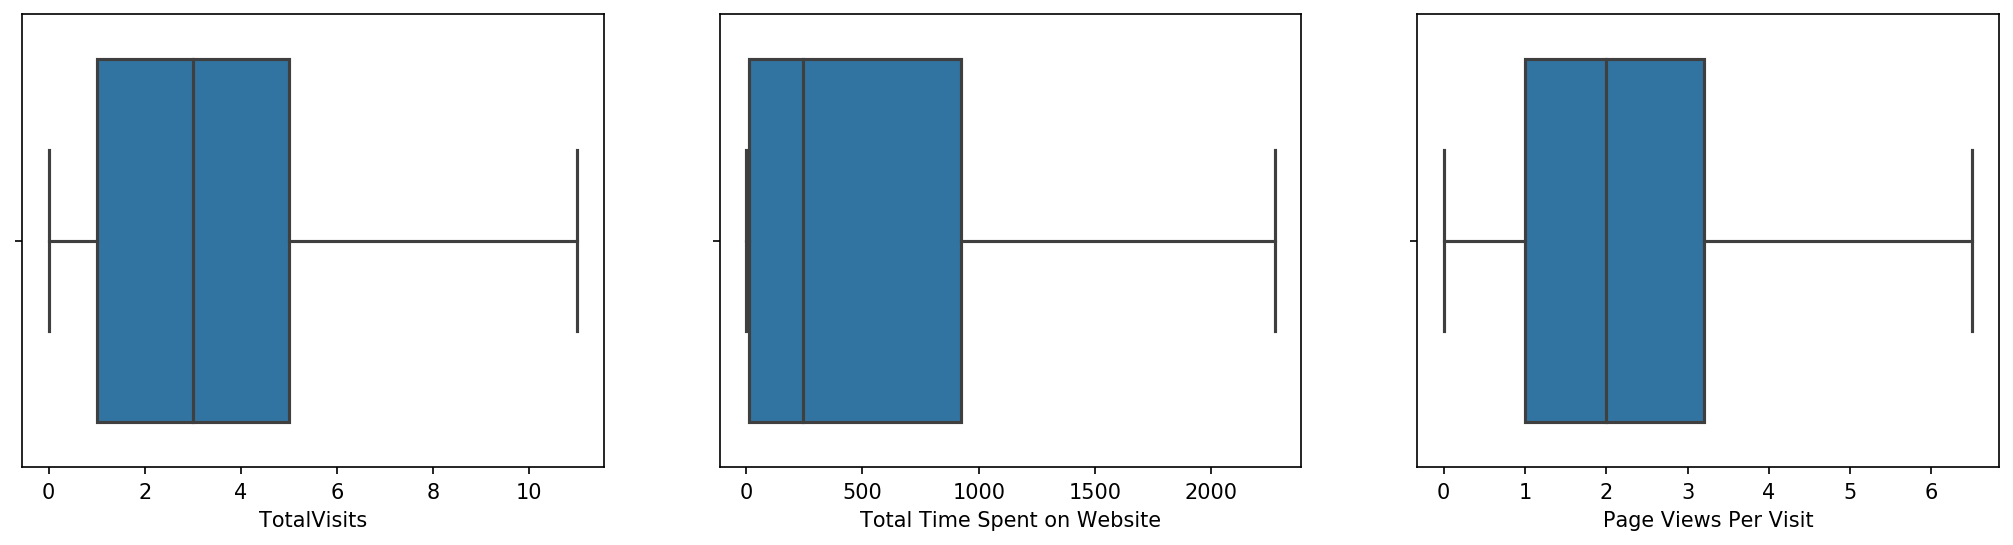

In [48]:
# boxplot for continous variable after outlier capping
plt.figure(figsize=(17,4), dpi= 150)
plt.subplot(1,3,1)
sns.boxplot(df['TotalVisits'])

plt.subplot(1,3,2)
sns.boxplot(df['Total Time Spent on Website'])

plt.subplot(1,3,3)
sns.boxplot(df['Page Views Per Visit'])

plt.show()

### 3.2 Categorical Variables

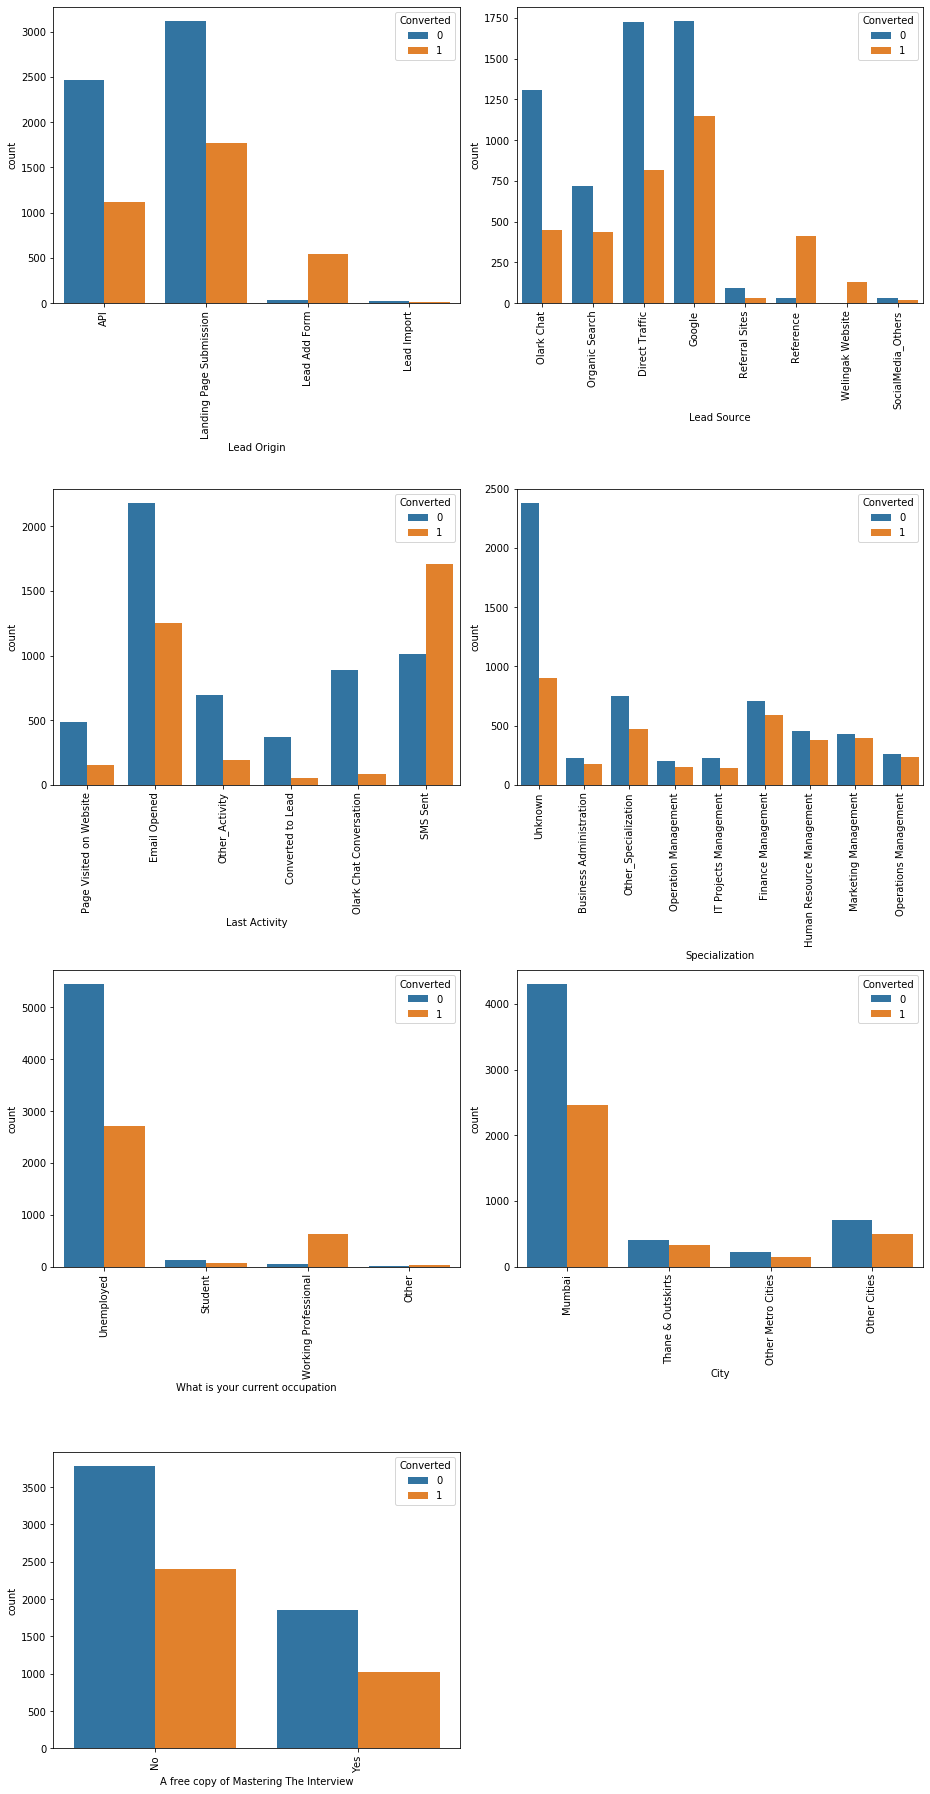

In [49]:
# visulaisation
cols = 2
rows = len(cat_var)//cols+1

plt.figure(figsize = (13,25))
for i in enumerate(cat_var):
    plt.subplot(rows,cols,i[0]+1)
    sns.countplot(x = i[1], hue= 'Converted', data = df)
    plt.xticks(rotation = 90)
    plt.tight_layout(pad= 1)
plt.show()

Insights:

1. Lead Origin: 
    - `API` and `Landing Page Submission` bring higher number of leads as well as conversion.
    - Although count of leads are not very high in `Lead Add Form`, it has a very high conversion rate.

2. Lead Source:
    - `Google` and `Direct traffic` generates maximum number of leads. Conversion Rate of `reference leads` and `leads through welingak website` is high.

3. Specialization
    - A lot of lead are having `Unknow Specialisation`
    - Management specializations are having higher conversion rate.
    
4. What is your current occupation
    - Higher number of leads are `Unemployed` however `Working Professional` are having higher conversion rate
    
5. City
     - Maximum number of lead are from `Mumbai` City
       
6. A free copy of Mastering The Interview    
    - Most of the lead have not opted for `A free copy of Mastering The Interview`.

7. Last Notable Activity
    - `SMS Sent` activity has higer conversion rate.

### 3.3 Numerical Variables:

In [50]:
# select numerical columns
num_cols = ['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']

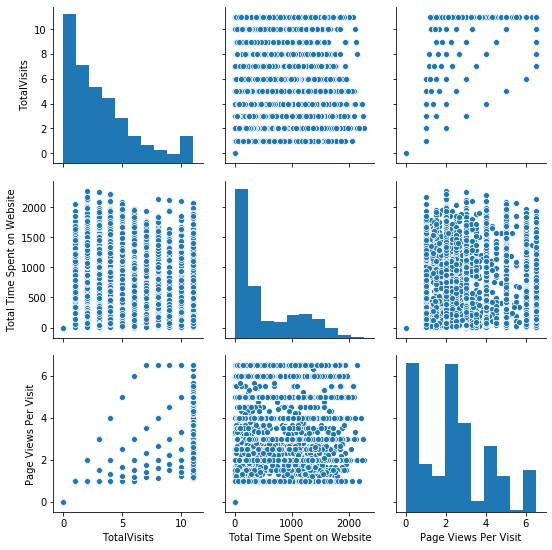

In [51]:
# paiplot
sns.pairplot(df[num_cols])
plt.show()

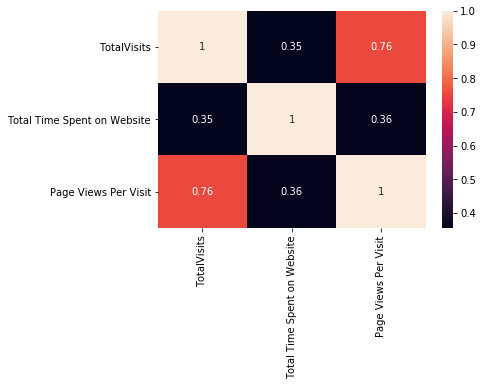

In [52]:
# heatmap
sns.heatmap(df[num_cols].corr(), annot=True)
plt.show()

Insights:
  
- There is high correlation between `Total Visit` and `Page Views Per Visit`

## 4. Data Preparation:

### 4.1 Create dummies for all categorical columns

In [53]:
# chekc columns
df.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'City',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [54]:
# get insights of categorical variables
df.describe(include='O')

,Lead Origin,Lead Source,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview
count,9074,9074,9074,9074,9074,9074,9074
unique,4,8,6,9,4,4,2
top,Landing Page Submission,Google,Email Opened,Unknown,Unemployed,Mumbai,No
freq,4885,2879,3432,3282,8159,6752,6186


In [55]:
# Creating a dummy variable for the variable 'Lead Origin'
cont = pd.get_dummies(df['Lead Origin'],prefix='Lead Origin',drop_first=True)
#Adding the results to the master dataframe
df = pd.concat([df,cont],axis=1)

# Creating a dummy variable for the variable 'Lead Source'
cont = pd.get_dummies(df['Lead Source'],prefix='Lead Source',drop_first=True)
#Adding the results to the master dataframe
df = pd.concat([df,cont],axis=1)  

# Creating a dummy variable for the variable 'Lead Source'
cont = pd.get_dummies(df['Last Activity'],prefix='Last Activity',drop_first=True)
#Adding the results to the master dataframe
df = pd.concat([df,cont],axis=1) 

# Creating a dummy variable for the variable 'Specialization'
cont = pd.get_dummies(df['Specialization'],prefix='Specialization',drop_first=True)
#Adding the results to the master dataframe
df = pd.concat([df,cont],axis=1)

# Creating a dummy variable for the variable 'What is your current occupation'
cont = pd.get_dummies(df['What is your current occupation'],prefix='What is your current occupation',drop_first=True)
#Adding the results to the master dataframe
df = pd.concat([df,cont],axis=1)

# Creating a dummy variable for the variable 'City'
cont = pd.get_dummies(df['City'],prefix='City',drop_first=True)
#Adding the results to the master dataframe
df = pd.concat([df,cont],axis=1)

# # Creating a dummy variable for the variable 'Last Notable Activity'
# cont = pd.get_dummies(df['Last Notable Activity'],prefix='Last Notable Activity',drop_first=True)
# #Adding the results to the master dataframe
# df = pd.concat([df,cont],axis=1)

In [56]:
#created dummies for the below variables, so drop the same
df = df.drop(['Lead Origin','Lead Source','Last Activity','Specialization','City','What is your current occupation'], 
             axis =1)
df.columns

Index(['Lead Number', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_SocialMedia_Others', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Other_Activity', 'Last Activity_Page Visited on Website',
       'Last Activity_SMS Sent', 'Specialization_Finance Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_Marketing Management',
       'Specialization_Operation Management',
       'Specialization_Operations Management',
       'Specialization_Other_Specialization'

In [57]:
# check for dataframe shape
df.shape

(9074, 35)

In [58]:
# Converting bInary varibales (Yes to 1 and No to 0)
df['A free copy of Mastering The Interview'] = df['A free copy of Mastering The Interview'].map({'Yes': 1, 'No': 0})
df['A free copy of Mastering The Interview'].value_counts()

0    6186
1    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [59]:
# check dataframe after dummies creation
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 35 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Number                                           9074 non-null   int64  
 1   Converted                                             9074 non-null   int64  
 2   TotalVisits                                           9074 non-null   float64
 3   Total Time Spent on Website                           9074 non-null   int64  
 4   Page Views Per Visit                                  9074 non-null   float64
 5   A free copy of Mastering The Interview                9074 non-null   int64  
 6   Lead Origin_Landing Page Submission                   9074 non-null   uint8  
 7   Lead Origin_Lead Add Form                             9074 non-null   uint8  
 8   Lead Origin_Lead Import                               9074

In [60]:
# Ensuring there are no categorical columns left in the dataframe
cols = df.columns
num_cols = df._get_numeric_data().columns
list(set(cols) - set(num_cols))

[]

### 4.2 Train - Test Split

In [61]:
# Creating feature variables of X
X = df.drop(['Converted','Lead Number'],1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_SocialMedia_Others,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Operation Management,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Unknown,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Metro Cities,City_Thane & Outskirts
0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4,2.0,1428,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0


In [62]:
# Creating feature variables of y
y = df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [63]:
# Splitting the dataset into test and train
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size =0.7, test_size =0.3, random_state = 100)

### 4.3 Feature Scaling

In [64]:
# Scaling the variables using standaredscaler
scaler = StandardScaler()

In [65]:
# Scaling of the numerical data X_train
num_cols = ['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']
X_train[num_cols]=scaler.fit_transform(X_train[num_cols])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_SocialMedia_Others,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Operation Management,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Unknown,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Metro Cities,City_Thane & Outskirts
3009,-0.431325,-0.160255,-0.161929,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1012,-0.431325,-0.540048,-0.161929,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
9226,-1.124566,-0.888650,-1.247280,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
4750,-0.431325,1.643304,-0.161929,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0
7987,0.608537,2.017593,0.109409,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0


In [66]:
# scaling numerical dat X_test
X_test[num_cols]=scaler.transform(X_test[num_cols])
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_SocialMedia_Others,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Operation Management,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Unknown,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Metro Cities,City_Thane & Outskirts
3271,0.261917,-0.600595,0.923423,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
1490,0.608537,1.887326,1.466098,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
7936,-0.431325,-0.752879,-0.161929,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
4216,-1.124566,-0.888650,-1.247280,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
3830,1.648399,-0.587751,2.280112,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0


## 5. Model Bulding

In [67]:
# Logistic Regression Model (Zero model)
logm = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
print(logm.fit().summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6317
Model Family:                Binomial   Df Model:                           33
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2666.5
Date:                Sat, 12 Sep 2020   Deviance:                       5332.9
Time:                        22:03:06   Pearson chi2:                 6.93e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

Insights:- 
- Since there are a lot of variables and it is difficult to build model with such high number of variable. So We'll use RFE to select significant variables.

#### Feature Selection Using RFE

In [68]:
# Running Logistic Regression
logreg = LogisticRegression()

In [69]:
# Running RFE 
rfe = RFE(logreg, 25)      # running RFE with 25 variables as output
rfe = rfe.fit(X_train, y_train)
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True, False, False,  True,
        True,  True,  True, False, False, False])

In [70]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 4),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 9),
 ('Lead Source_SocialMedia_Others', True, 1),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other_Activity', True, 1),
 ('Last Activity_Page Visited on Website', True, 1),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Finance Management', True, 1),
 ('Specialization_Human Resource Management', False, 2),
 ('Specialization_IT Projects Management', True, 1),
 ('Specialization_Marketing Managem

In [71]:
col_rfe = X_train.columns[rfe.support_]
col_rfe

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_SocialMedia_Others', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Other_Activity', 'Last Activity_Page Visited on Website',
       'Last Activity_SMS Sent', 'Specialization_Finance Management',
       'Specialization_IT Projects Management',
       'Specialization_Marketing Management',
       'Specialization_Operation Management', 'Specialization_Unknown',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

Insights:

Now you have all the variables selected by RFE and since we care about the statistics part, i.e. the p-values and the VIFs, let's use these variables to create a logistic regression model using statsmodels.

#### Assessing the model with StatsModels

In [72]:
# selct x_train based on RFE
X_train_rfe = X_train[col_rfe]

In [73]:
# create function for stats logistic model 
def sm_logregmodel(X_train_sm):
    #Add constant
    X_train_sm = sm.add_constant(X_train_sm)

    # create a fitted model
    logm = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
    res = logm.fit()
    return res

In [74]:
# Function to calculate VIF
# calculate VIF
def vif_calc(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by='VIF', ascending = False)
    return vif

In [75]:
# Create 1st model with RFE features
logm1 = sm_logregmodel(X_train_rfe)
print(logm1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6325
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2668.4
Date:                Sat, 12 Sep 2020   Deviance:                       5336.8
Time:                        22:03:08   Pearson chi2:                 6.88e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [76]:
# Loop to remove P value variables >0.05 in bstep mannen and update model

pvalue = logm1.pvalues[1:]
while(max(pvalue)>0.05):
    maxp_var = pvalue[pvalue == pvalue.max()].index
    print('Removed variable:' , maxp_var[0], '    P value: ', round(max(pvalue),3))
    
    # drop variable with high p value
    X_train_rfe = X_train_rfe.drop(maxp_var, axis = 1)
    logm1 = sm_logregmodel(X_train_rfe)
    pvalue = logm1.pvalues[1:]

Removed variable: Lead Source_SocialMedia_Others     P value:  0.553
Removed variable: Specialization_Operation Management     P value:  0.546
Removed variable: Specialization_IT Projects Management     P value:  0.404
Removed variable: Last Activity_Olark Chat Conversation     P value:  0.146
Removed variable: What is your current occupation_Student     P value:  0.126
Removed variable: Specialization_Finance Management     P value:  0.111
Removed variable: Lead Source_Reference     P value:  0.073
Removed variable: Specialization_Marketing Management     P value:  0.059
Removed variable: Lead Origin_Lead Import     P value:  0.064
Removed variable: Lead Source_Google     P value:  0.052


In [77]:
# Create 1st model with RFE features
logm2 = sm_logregmodel(X_train_rfe)
print(logm2.summary())

# Check for VIF
print(vif_calc(X_train_rfe))

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2679.2
Date:                Sat, 12 Sep 2020   Deviance:                       5358.4
Time:                        22:03:09   Pearson chi2:                 6.89e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [78]:
# drop variable with high p value and update the model
X_train_rfe.drop('What is your current occupation_Unemployed', axis = 1, inplace = True)
#update model
logm3 = sm_logregmodel(X_train_rfe)
print(logm3.summary())

# check VIF
print(vif_calc(X_train_rfe))

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2683.0
Date:                Sat, 12 Sep 2020   Deviance:                       5365.9
Time:                        22:03:09   Pearson chi2:                 6.91e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [79]:
# drop variable with high p value and update the model
X_train_rfe.drop('Lead Origin_Landing Page Submission', axis = 1, inplace = True)
#update model
logm4 = sm_logregmodel(X_train_rfe)
print(logm4.summary())

# check VIF
print(vif_calc(X_train_rfe))

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2714.3
Date:                Sat, 12 Sep 2020   Deviance:                       5428.7
Time:                        22:03:10   Pearson chi2:                 6.79e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [80]:
# drop variable with high p value and update the model
X_train_rfe.drop('Lead Source_Welingak Website', axis = 1, inplace = True)
#update model
logm5 = sm_logregmodel(X_train_rfe)
print(logm5.summary())

# check VIF
print(vif_calc(X_train_rfe))

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2721.7
Date:                Sat, 12 Sep 2020   Deviance:                       5443.5
Time:                        22:03:10   Pearson chi2:                 7.01e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [81]:
# List down final model varibales and its coefficients

# assign final model to lm_final
log_final = logm5

# list down and check variables of final model
var_final = list(log_final.params.index)
var_final.remove('const')
print('Final Selected Variables:', var_final)

# Print the coefficents of final varible
print('\033[1m{:10s}\033[0m'.format('\nCoefficent for the variables are:'))
print(round(log_final.params,3))

Final Selected Variables: ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'A free copy of Mastering The Interview', 'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat', 'Last Activity_Email Opened', 'Last Activity_Other_Activity', 'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent', 'Specialization_Unknown', 'What is your current occupation_Working Professional']

Coefficent for the variables are:
const                                                  -2.397
TotalVisits                                             0.366
Total Time Spent on Website                             1.117
Page Views Per Visit                                   -0.360
A free copy of Mastering The Interview                 -0.483
Lead Origin_Lead Add Form                               4.079
Lead Source_Olark Chat                                  1.317
Last Activity_Email Opened                              1.459
Last Activity_Other_Activity                            0.826
La

## 6. Model Evaluation

In [82]:
# getting the predicted values on the train set
X_train_sm = sm.add_constant(X_train[var_final])
y_train_pred = log_final.predict(X_train_sm)
y_train_pred[:10]

3009    0.154418
1012    0.463617
9226    0.486903
4750    0.869579
7987    0.930747
1281    0.792406
2880    0.109980
4971    0.874782
7536    0.791535
1248    0.839414
dtype: float64

In [83]:
# Reshaping the numpy array containing predicted values
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.15441828, 0.46361695, 0.48690291, 0.86957868, 0.93074684,
       0.79240567, 0.10997969, 0.8747815 , 0.79153495, 0.83941402])

In [84]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob': y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.154418
1,0,0.463617
2,0,0.486903
3,1,0.869579
4,1,0.930747


In [85]:
# Prediction at 0.5
cut_off = 0.5
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > cut_off else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,predicted
0,0,0.154418,0
1,0,0.463617,0
2,0,0.486903,0
3,1,0.869579,1
4,1,0.930747,1


### Metric Evaluation: (Train Set)

In [86]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3489  416]
 [ 827 1619]]


In [87]:
# Classification Summary
from sklearn.metrics import classification_report
print(classification_report(y_train_pred_final.Converted, y_train_pred_final.predicted))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      3905
           1       0.80      0.66      0.72      2446

    accuracy                           0.80      6351
   macro avg       0.80      0.78      0.79      6351
weighted avg       0.80      0.80      0.80      6351



Insights:

- with the current cut-off as 0.5 the accuracy is 0.81 which is acceptable, but Sensitivity/Recall is 0.69 which is quite low. So we need to optmise the cut-off point.

### Finding Optimal cutoff point

The previous cutoff was randomly selected and we need to find the optimal one

### ROC Curve:

In [88]:
# function for ROC curve
def draw_roc( actual, probs ):
    from sklearn.metrics import roc_curve
    from sklearn.metrics import roc_auc_score 
    
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    plt.show()
    
    # fpr, tpr, thresholds = roc_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)
    auc_score = roc_auc_score(actual, probs)
    print('ROC AUC : ',round(auc_score,2))
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]
    print("Threshold value is:", round(optimal_threshold,2))

#     return fpr,tpr, thresholds

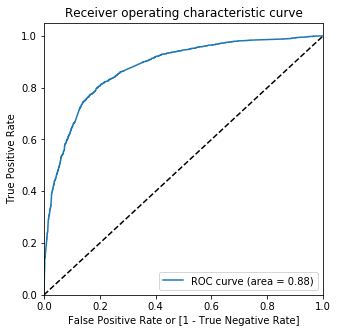

ROC AUC :  0.88
Threshold value is: 0.36


In [89]:
# plot Roc Curve
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [90]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.154418,0,1,1,0,0,0,0,0,0,0,0
1,0,0.463617,0,1,1,1,1,1,0,0,0,0,0
2,0,0.486903,0,1,1,1,1,1,0,0,0,0,0
3,1,0.869579,1,1,1,1,1,1,1,1,1,1,0
4,1,0.930747,1,1,1,1,1,1,1,1,1,1,1


In [91]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.598488  0.972200  0.364405
0.2   0.2  0.722248  0.920687  0.597951
0.3   0.3  0.791529  0.831153  0.766709
0.4   0.4  0.811211  0.766558  0.839181
0.5   0.5  0.804283  0.661897  0.893470
0.6   0.6  0.794048  0.593213  0.919846
0.7   0.7  0.772477  0.496321  0.945455
0.8   0.8  0.752952  0.408422  0.968758
0.9   0.9  0.701149  0.244890  0.986940


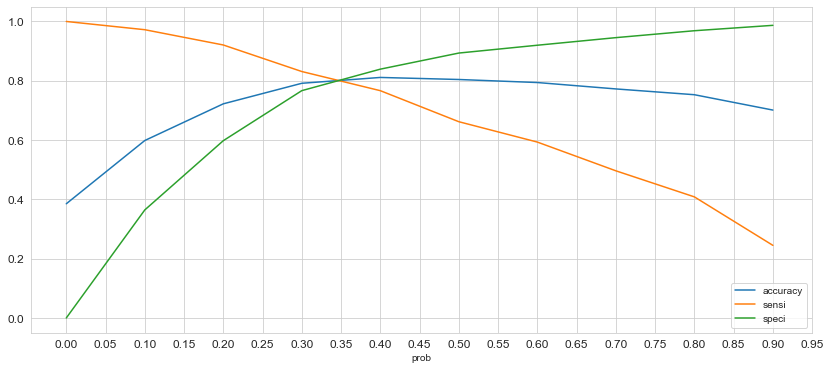

In [92]:
# validate Optimal cut off point
sns.set_style("whitegrid")
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'], figsize=(14,6))
# plot x axis limits
plt.xticks(np.arange(0, 1, step=0.05), size = 12)
plt.yticks(size = 12)
plt.show()

- From the curve above, 0.35 is the optimum point to take it as a cutoff probability

In [93]:
cut_off = 0.35
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > cut_off else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.154418,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.463617,0,1,1,1,1,1,0,0,0,0,0,1
2,0,0.486903,0,1,1,1,1,1,0,0,0,0,0,1
3,1,0.869579,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.930747,1,1,1,1,1,1,1,1,1,1,1,1


In [94]:
confusion_train = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
confusion_train

array([[3150,  755],
       [ 486, 1960]], dtype=int64)

**Precision and recall tradeoff**

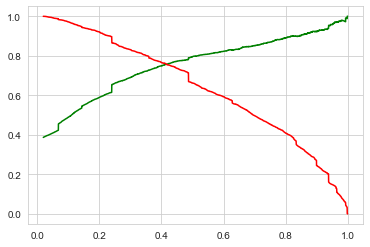

In [95]:
# Precision and recall tradeoff
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

# Slightly alter the figure size to make it more horizontal.
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

Insights:

- From the precision-recall graph above, we get the optical threshold value as close to 0.4. Which is close to our earlier optimal cutoff point.

**Classification Report Summary:**

In [96]:
# Classification - at optimal cut off
from sklearn.metrics import classification_report
print(classification_report(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84      3905
           1       0.72      0.80      0.76      2446

    accuracy                           0.80      6351
   macro avg       0.79      0.80      0.80      6351
weighted avg       0.81      0.80      0.81      6351



### 6.1 Prediction on Test set

In [97]:
# getting the predicted values on the train set
X_test_sm = sm.add_constant(X_test[var_final])
y_test_pred = log_final.predict(X_test_sm)
y_test_pred[:10]

3271    0.081562
1490    0.956277
7936    0.079101
4216    0.898865
3830    0.091516
1800    0.757864
6507    0.324177
4821    0.246689
4223    0.937576
4714    0.486903
dtype: float64

In [98]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model
y_test_pred_final = pd.DataFrame({'Converted':y_test.values, 'Conversion_Prob': y_test_pred})
y_test_pred_final.head()

,Converted,Conversion_Prob
3271,0,0.081562
1490,1,0.956277
7936,0,0.079101
4216,1,0.898865
3830,0,0.091516


In [99]:
# Final Prediction on test set
y_test_pred_final['predicted'] = y_test_pred_final.Conversion_Prob.map(lambda x: 1 if x > cut_off else 0)

# Let's see the head
y_test_pred_final.head()

,Converted,Conversion_Prob,predicted
3271,0,0.081562,0
1490,1,0.956277,1
7936,0,0.079101,0
4216,1,0.898865,1
3830,0,0.091516,0


**Metric Evaluation: (Test Set)**

In [100]:
# Classification summary on test set
from sklearn.metrics import classification_report
print(classification_report(y_test_pred_final.Converted, y_test_pred_final.predicted))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84      1734
           1       0.71      0.80      0.75       989

    accuracy                           0.81      2723
   macro avg       0.79      0.81      0.80      2723
weighted avg       0.81      0.81      0.81      2723



**Cross Validation Score on test data**

To avoid overfitting, let us calculate the Cross Validation Score to see how our model performs

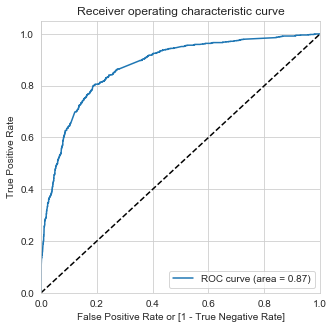

ROC AUC :  0.87
Threshold value is: 0.36


In [101]:
# ROC Curve
draw_roc(y_test_pred_final.Converted, y_test_pred_final.Conversion_Prob)

Insights:

Since we got a value of 0.87, our model seems to be doing well on the test dataset.

### 6.3 Model Summary

In [102]:
# function to predict and get classification summary

def classification_model_metrics(logm, X, y, cut_off):
    
    # check variables of model
    X_cols = list(logm.params.index)
    X_cols.remove('const')
    
    # getting the predicted values on the train set
#     var_final = X[log_final.params.index[1:]]
    X_sm = sm.add_constant(X[X_cols])
    y_pred = logm.predict(X_sm)
    
    # Reshaping the numpy array containing predicted values
    y_pred = y_pred.values.reshape(-1)

    # Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model
    y_pred_final = pd.DataFrame({'Converted':y.values, 'Conversion_Prob': y_pred})

    # Prediction at cutoff
    y_pred_final['predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > cut_off else 0)

    # Classification Summary
    from sklearn.metrics import classification_report
    classification_summary = classification_report(y_pred_final.Converted, y_pred_final.predicted, digits = 2)
    
    return classification_summary

In [103]:
# Model Metric Evaluation at optimum cut off
model = logm5
cut_off = 0.35

print('model metrics of train set @', cut_off  )
model_metrics = classification_model_metrics(model,X_train, y_train, cut_off)
print(model_metrics)
print('--------------------------------------------------------')
print('model metrics of test set @', cut_off  )
model_metrics = classification_model_metrics(model,X_test, y_test, cut_off)
print(model_metrics)

model metrics of train set @ 0.35
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      3905
           1       0.72      0.80      0.76      2446

    accuracy                           0.80      6351
   macro avg       0.79      0.80      0.80      6351
weighted avg       0.81      0.80      0.81      6351

--------------------------------------------------------
model metrics of test set @ 0.35
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      1734
           1       0.71      0.80      0.75       989

    accuracy                           0.81      2723
   macro avg       0.79      0.81      0.80      2723
weighted avg       0.81      0.81      0.81      2723



## 7. Final Prediction and Lead Score

Calculating Lead score for the entire dataset

𝐿𝑒𝑎𝑑𝑆𝑐𝑜𝑟𝑒=100∗𝐶𝑜𝑛𝑣𝑒𝑟𝑠𝑖𝑜𝑛𝑃𝑟𝑜𝑏𝑎𝑏𝑖𝑙𝑖𝑡𝑦

This needs to be calculated for all the leads from the original dataset (train + test)

In [104]:
# getting the predicted values on the total dataset
X = df[var_final]
X_sm = sm.add_constant(X[var_final])
y_pred = log_final.predict(X_sm)
y_pred[:10]

0    0.269713
1    1.000000
2    1.000000
3    1.000000
4    1.000000
5    0.160299
6    1.000000
7    0.160299
8    1.000000
9    1.000000
dtype: float64

In [105]:
# #lead score for customer in the range 0-100
Lead_Score = df[['Lead Number']]
Lead_Score['Lead_Score'] = round(y_pred*100,2)
Lead_Score['Coversion_Pred'] = y_pred.map(lambda x: 1 if x > cut_off else 0)
Lead_Score.head()

,Lead Number,Lead_Score,Coversion_Pred
0,660737,26.97,0
1,660728,100.00,1
2,660727,100.00,1
3,660719,100.00,1
4,660681,100.00,1


**Feature Importance**

In [106]:
#Selecting the coefficients of the selected features from our final model excluding the intercept/constant
final_params = log_final.params[1:]
# Print the coefficents of final varible
print('\033[1m{:10s}\033[0m'.format('\nCoefficent for the final variables are:'))
print(round(final_params,3))


Coefficent for the final variables are:
TotalVisits                                             0.366
Total Time Spent on Website                             1.117
Page Views Per Visit                                   -0.360
A free copy of Mastering The Interview                 -0.483
Lead Origin_Lead Add Form                               4.079
Lead Source_Olark Chat                                  1.317
Last Activity_Email Opened                              1.459
Last Activity_Other_Activity                            0.826
Last Activity_Page Visited on Website                   0.660
Last Activity_SMS Sent                                  2.559
Specialization_Unknown                                 -0.575
What is your current occupation_Working Professional    2.704
dtype: float64


In [107]:
#Getting a relative coeffient value for all the features wrt the feature with the highest coefficient
feature_importance = final_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance.sort_values(ascending = False)

Lead Origin_Lead Add Form                               100.000000
What is your current occupation_Working Professional     66.292272
Last Activity_SMS Sent                                   62.739348
Last Activity_Email Opened                               35.765804
Lead Source_Olark Chat                                   32.288110
Total Time Spent on Website                              27.382964
Last Activity_Other_Activity                             20.253030
Last Activity_Page Visited on Website                    16.179866
TotalVisits                                               8.973137
Page Views Per Visit                                     -8.820986
A free copy of Mastering The Interview                  -11.844940
Specialization_Unknown                                  -14.109912
dtype: float64

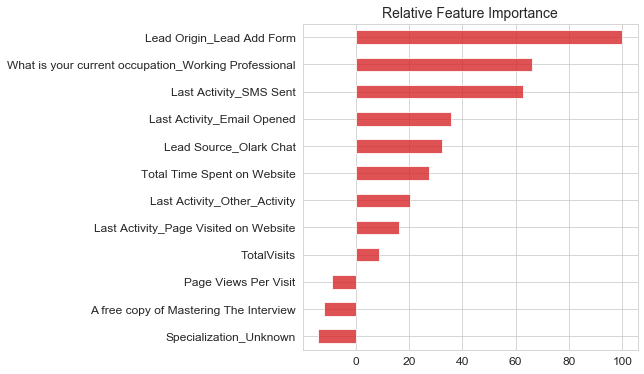

In [108]:
feature_importance = feature_importance.sort_values()
plt.figure(figsize=(6,6))
feature_importance.plot.barh(align='center', color = 'tab:red',alpha=0.8, fontsize = 12)
plt.title('Relative Feature Importance', fontsize=14)
plt.show()

Insights:

Important features Contribution for Lead conversion:  `Lead Add Form (Lead Origin), Working Professional (What is  your current occupation), SMS Sent (Last Activity)`

## 8. Conclusion and Recommendation:

**Conclusions:**

1. The Accuracy, Precision and Recall score we got from test set in acceptable range.
2. All the model metrics are similar which indicates that the model is in stable state 
3. Business should consider  lead score more than 35 as a hot lead for maximum conversion
4. Important features contrinution for Lead conversion rate:
        a. Lead Add Form (Lead Origin)
        b. Working Professional (What is  your current occupation )        
        c. SMS Sent (Last Activity)

**Keeping these in mind the X Education can flourish as they have a very high chance to get almost   all the potential buyers to change their mind and buy their courses.**

**Business recommendations:**

1. As we have ~80% of in both train and test database, with  Recall / Sensitivity / TPR of 80%, it means we have identified our most of the converted customers correctly. 
2. However, by changing cut off limit we can achieve business target. As by reducing cut off, education group can have more target’s while increasing cut off   they can limit out targets and will focus only on  those customer’s those have very high probability of conversion or “Hot Leads”.
